# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight')

# Read

In [2]:
df=pd.read_csv('merged_df.csv',index_col=0)
df

,ID_CLIENTE,CANALE_ATTIVAZIONE,TERRITORIO,TARGET,FLG_DOM_BANCARIA,ETA,SESSO,PAESE,DATI_PERSONALI,DATA_ATTIVAZIONE,mean_pd,max_pd,had_delays,num_products
0,"""00000000""",Web,Nord,1.0,NO,43,F,NaN,SI,20210106,2.333333,4.2,1,3
1,"""00000001""",Pull,Sud_e_Isole,1.0,SI,41,M,NaN,SI,20210223,1.550000,2.1,1,2
2,"""00000002""",Web,Sud_e_Isole,1.0,NO,52,M,IT,SI,20210113,4.220000,8.0,1,5
3,"""00000003""",Push,Centro,1.0,NO,18,M,IT,NO,20210110,2.000000,2.0,1,1
4,"""00000004""",Pull,Centro,1.0,NO,24,M,IT,SI,20210204,1.000000,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",Pull,Sud_e_Isole,0.0,NO,45,M,IT,NaN,20210125,0.000000,0.0,1,3
249996,"""00249996""",Push,Centro,0.0,SI,52,F,NaN,NO,20210102,2.100000,2.1,1,1
249997,"""00249997""",Web,Centro,0.0,SI,18,M,IT,SI,20210115,0.900000,0.9,0,1
249998,"""00249998""",Push,Nord,0.0,SI,76,M,IT,SI,20210204,0.000000,0.0,0,1


In [3]:
df['PAESE']=df['PAESE'].fillna('OTHERS')
df=df[~df['TARGET'].isna()]
df['SESSO']=df['SESSO'].fillna('Others')
df['CANALE_ATTIVAZIONE']=df['CANALE_ATTIVAZIONE'].fillna('Others')

/tmp/ipykernel_39659/211580549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SESSO']=df['SESSO'].fillna('Others')
/tmp/ipykernel_39659/211580549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CANALE_ATTIVAZIONE']=df['CANALE_ATTIVAZIONE'].fillna('Others')


In [4]:
df=df.drop(columns=['DATA_ATTIVAZIONE','DATI_PERSONALI'])
df

,ID_CLIENTE,CANALE_ATTIVAZIONE,TERRITORIO,TARGET,FLG_DOM_BANCARIA,ETA,SESSO,PAESE,mean_pd,max_pd,had_delays,num_products
0,"""00000000""",Web,Nord,1.0,NO,43,F,OTHERS,2.333333,4.2,1,3
1,"""00000001""",Pull,Sud_e_Isole,1.0,SI,41,M,OTHERS,1.550000,2.1,1,2
2,"""00000002""",Web,Sud_e_Isole,1.0,NO,52,M,IT,4.220000,8.0,1,5
3,"""00000003""",Push,Centro,1.0,NO,18,M,IT,2.000000,2.0,1,1
4,"""00000004""",Pull,Centro,1.0,NO,24,M,IT,1.000000,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",Pull,Sud_e_Isole,0.0,NO,45,M,IT,0.000000,0.0,1,3
249996,"""00249996""",Push,Centro,0.0,SI,52,F,OTHERS,2.100000,2.1,1,1
249997,"""00249997""",Web,Centro,0.0,SI,18,M,IT,0.900000,0.9,0,1
249998,"""00249998""",Push,Nord,0.0,SI,76,M,IT,0.000000,0.0,0,1


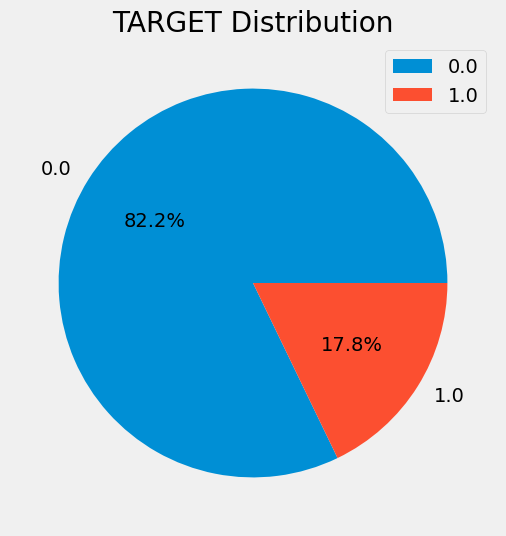

In [5]:
fig, axs = plt.subplots(1,figsize=(6,6))
plt.pie(df['TARGET'].value_counts(),labels=df['TARGET'].value_counts().keys(),autopct='%1.1f%%')
plt.title('TARGET Distribution')
plt.legend()
plt.show()

Our data is pretty unbalanced

# Feature Engineering

In [6]:
df1=df.copy()

## Scaling Age:

In [7]:
df1['ETA']=(df1['ETA']-df1['ETA'].min())/(df1['ETA'].max()-df1['ETA'].min())
df1

,ID_CLIENTE,CANALE_ATTIVAZIONE,TERRITORIO,TARGET,FLG_DOM_BANCARIA,ETA,SESSO,PAESE,mean_pd,max_pd,had_delays,num_products
0,"""00000000""",Web,Nord,1.0,NO,0.409836,F,OTHERS,2.333333,4.2,1,3
1,"""00000001""",Pull,Sud_e_Isole,1.0,SI,0.377049,M,OTHERS,1.550000,2.1,1,2
2,"""00000002""",Web,Sud_e_Isole,1.0,NO,0.557377,M,IT,4.220000,8.0,1,5
3,"""00000003""",Push,Centro,1.0,NO,0.000000,M,IT,2.000000,2.0,1,1
4,"""00000004""",Pull,Centro,1.0,NO,0.098361,M,IT,1.000000,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",Pull,Sud_e_Isole,0.0,NO,0.442623,M,IT,0.000000,0.0,1,3
249996,"""00249996""",Push,Centro,0.0,SI,0.557377,F,OTHERS,2.100000,2.1,1,1
249997,"""00249997""",Web,Centro,0.0,SI,0.000000,M,IT,0.900000,0.9,0,1
249998,"""00249998""",Push,Nord,0.0,SI,0.950820,M,IT,0.000000,0.0,0,1


In [8]:
string_columns=df1.dtypes[df1.dtypes==object][1:].keys()

## Random Forrest FE

In [9]:
dff=df1.copy()
dff

,ID_CLIENTE,CANALE_ATTIVAZIONE,TERRITORIO,TARGET,FLG_DOM_BANCARIA,ETA,SESSO,PAESE,mean_pd,max_pd,had_delays,num_products
0,"""00000000""",Web,Nord,1.0,NO,0.409836,F,OTHERS,2.333333,4.2,1,3
1,"""00000001""",Pull,Sud_e_Isole,1.0,SI,0.377049,M,OTHERS,1.550000,2.1,1,2
2,"""00000002""",Web,Sud_e_Isole,1.0,NO,0.557377,M,IT,4.220000,8.0,1,5
3,"""00000003""",Push,Centro,1.0,NO,0.000000,M,IT,2.000000,2.0,1,1
4,"""00000004""",Pull,Centro,1.0,NO,0.098361,M,IT,1.000000,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",Pull,Sud_e_Isole,0.0,NO,0.442623,M,IT,0.000000,0.0,1,3
249996,"""00249996""",Push,Centro,0.0,SI,0.557377,F,OTHERS,2.100000,2.1,1,1
249997,"""00249997""",Web,Centro,0.0,SI,0.000000,M,IT,0.900000,0.9,0,1
249998,"""00249998""",Push,Nord,0.0,SI,0.950820,M,IT,0.000000,0.0,0,1


In [10]:
def encode_strings_to_numbers(dg,list_of_columns):
    df=dg.copy()
    for i in list_of_columns:
        print(f"\n{i} :")
        map_di=dff[i].unique()
        map_di.sort()
        map_dic=dict(zip([i for i in range(len(map_di))],map_di))
        print(map_dic)
        map_dic=dict(zip(map_di,[i for i in range(len(map_di))]))
        df[i]=df[i].map(map_dic)
    return df

In [11]:
dff=encode_strings_to_numbers(dff,string_columns)
dff


CANALE_ATTIVAZIONE :
{0: 'Others', 1: 'Pull', 2: 'Push', 3: 'Web'}

TERRITORIO :
{0: 'Centro', 1: 'Nord', 2: 'Sud_e_Isole'}

FLG_DOM_BANCARIA :
{0: 'NO', 1: 'SI'}

SESSO :
{0: 'F', 1: 'M', 2: 'Others'}

PAESE :
{0: 'IT', 1: 'OTHERS'}


,ID_CLIENTE,CANALE_ATTIVAZIONE,TERRITORIO,TARGET,FLG_DOM_BANCARIA,ETA,SESSO,PAESE,mean_pd,max_pd,had_delays,num_products
0,"""00000000""",3,1,1.0,0,0.409836,0,1,2.333333,4.2,1,3
1,"""00000001""",1,2,1.0,1,0.377049,1,1,1.550000,2.1,1,2
2,"""00000002""",3,2,1.0,0,0.557377,1,0,4.220000,8.0,1,5
3,"""00000003""",2,0,1.0,0,0.000000,1,0,2.000000,2.0,1,1
4,"""00000004""",1,0,1.0,0,0.098361,1,0,1.000000,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",1,2,0.0,0,0.442623,1,0,0.000000,0.0,1,3
249996,"""00249996""",2,0,0.0,1,0.557377,0,1,2.100000,2.1,1,1
249997,"""00249997""",3,0,0.0,1,0.000000,1,0,0.900000,0.9,0,1
249998,"""00249998""",2,1,0.0,1,0.950820,1,0,0.000000,0.0,0,1


### Modeling

In [33]:
y_train=dff['TARGET'].values
x_train=dff.drop(columns=['ID_CLIENTE','TARGET']).values
print(x_train.shape)
print(y_train.shape)


(248852, 10)
(248852,)


In [34]:
rs=11
split_number=round(len(x_train)*0.7)
np.random.seed(rs)
np.random.shuffle(x_train)
np.random.seed(rs)
np.random.shuffle(y_train)


x_test=x_train[split_number:]
y_test=y_train[split_number:]
x_train=x_train[:split_number]
y_train=y_train[:split_number]

### Handling imbalanced data using Sample weight

In [35]:
sample_weight_train=y_train*(np.sum(y_train==0)/np.sum(y_train==1))
sample_weight_train[sample_weight_train==0]=1
print(sample_weight_train.max())

sample_weight_test=y_test*(np.sum(y_test==0)/np.sum(y_test==1))
sample_weight_test[sample_weight_test==0]=1
print(sample_weight_test.max())

4.616870344694161
4.58133971291866


In [29]:
clf=RandomForestClassifier(n_estimators=200, max_depth=9, random_state=0)
clf.fit(x_train, y_train,sample_weight=sample_weight_train)
print("Train data, without and with sample weight:")
print(clf.score(x_train,y_train))
print(clf.score(x_train,y_train,sample_weight=sample_weight_train))
print("Test data, without and with sample weight:")
print(clf.score(x_test,y_test))
print(clf.score(x_test,y_test,sample_weight=sample_weight_test))

y_pred=clf.predict(x_test)
print("No. of Positives detected:")
print(y_pred[y_pred==1].sum())
print("No. of correct Positives detected:")
print(y_pred[y_pred==y_test].sum())
print(classification_report(y_test,y_pred))

Train data, without and with sample weight:
0.9654182644836851
0.9413207761667036
Test data, without and with sample weight:
0.9637537505357908
0.9399143161339379
No. of Positives detected:
13431.0
No. of correct Positives detected:
12018.0
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     61345
         1.0       0.89      0.90      0.90     13311

    accuracy                           0.96     74656
   macro avg       0.94      0.94      0.94     74656
weighted avg       0.96      0.96      0.96     74656



In [16]:
pd.DataFrame(pd.Series(clf.feature_importances_,dff.drop(columns=['ID_CLIENTE','TARGET']).columns),columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
mean_pd,0.493139
max_pd,0.341353
had_delays,0.078412
FLG_DOM_BANCARIA,0.058562
TERRITORIO,0.018159
num_products,0.007772
CANALE_ATTIVAZIONE,0.001465
ETA,0.000872
SESSO,0.000163
PAESE,0.000103


# RandomForrest using One-Hot features

In [17]:
def get_dummy(df,list_of_columns):
    dg=df.copy()
    for i in list_of_columns:
        a=pd.get_dummies(df[i],prefix=i)
        dg=pd.concat([dg,a],axis=1)
    return dg.drop(columns=list_of_columns)

In [18]:
df2=get_dummy(df1,string_columns)

In [19]:
# df2.corr().sort_values(by='TARGET',ascending=False)

In [20]:
df2

,ID_CLIENTE,TARGET,ETA,mean_pd,max_pd,had_delays,num_products,CANALE_ATTIVAZIONE_Others,CANALE_ATTIVAZIONE_Pull,CANALE_ATTIVAZIONE_Push,...,TERRITORIO_Centro,TERRITORIO_Nord,TERRITORIO_Sud_e_Isole,FLG_DOM_BANCARIA_NO,FLG_DOM_BANCARIA_SI,SESSO_F,SESSO_M,SESSO_Others,PAESE_IT,PAESE_OTHERS
0,"""00000000""",1.0,0.409836,2.333333,4.2,1,3,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,"""00000001""",1.0,0.377049,1.550000,2.1,1,2,0,1,0,...,0,0,1,0,1,0,1,0,0,1
2,"""00000002""",1.0,0.557377,4.220000,8.0,1,5,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,"""00000003""",1.0,0.000000,2.000000,2.0,1,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
4,"""00000004""",1.0,0.098361,1.000000,1.0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,"""00249995""",0.0,0.442623,0.000000,0.0,1,3,0,1,0,...,0,0,1,1,0,0,1,0,1,0
249996,"""00249996""",0.0,0.557377,2.100000,2.1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
249997,"""00249997""",0.0,0.000000,0.900000,0.9,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
249998,"""00249998""",0.0,0.950820,0.000000,0.0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [21]:
y_train=df2['TARGET'].values
x_train=df2.drop(columns=['ID_CLIENTE','TARGET']).values
print(x_train.shape)
print(y_train.shape)


(248852, 19)
(248852,)


In [22]:
rs=42
split_number=round(len(x_train)*0.7)
np.random.seed(rs)
np.random.shuffle(x_train)
np.random.seed(rs)
np.random.shuffle(y_train)


x_test=x_train[split_number:]
y_test=y_train[split_number:]
x_train=x_train[:split_number]
y_train=y_train[:split_number]

### Handling imbalanced data using Sample weight

In [23]:
sample_weight_train=y_train*(np.sum(y_train==0)/np.sum(y_train==1))
sample_weight_train[sample_weight_train==0]=1
print(sample_weight_train.max())

sample_weight_test=y_test*(np.sum(y_test==0)/np.sum(y_test==1))
sample_weight_test[sample_weight_test==0]=1
print(sample_weight_test.max())

4.605122594761568
4.608594395612651


In [24]:
clf=RandomForestClassifier(n_estimators=200, max_depth=7, random_state=0)
clf.fit(x_train, y_train,sample_weight=sample_weight_train)
print("Train data, without and with sample weight:")
print(clf.score(x_train,y_train))
print(clf.score(x_train,y_train,sample_weight=sample_weight_train))
print("Test data, without and with sample weight:")
print(clf.score(x_test,y_test))
print(clf.score(x_test,y_test,sample_weight=sample_weight_test))

y_pred=clf.predict(x_test)
print("No. of Positives detected:")
print(y_pred[y_pred==1].sum())
print("No. of correct Positives detected:")
print(y_pred[y_pred==y_test].sum())
print(classification_report(y_test,y_pred))

Train data, without and with sample weight:
0.9645916094514225
0.9386387717755934
Test data, without and with sample weight:
0.9637001714530647
0.9383228620385147
No. of Positives detected:
13329.0
No. of correct Positives detected:
11965.0
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     61345
         1.0       0.90      0.90      0.90     13311

    accuracy                           0.96     74656
   macro avg       0.94      0.94      0.94     74656
weighted avg       0.96      0.96      0.96     74656



In [25]:
pd.DataFrame(pd.Series(clf.feature_importances_,df2.drop(columns=['ID_CLIENTE','TARGET']).columns),columns=['Importance']).sort_values(by='Importance',ascending=False)

,Importance
mean_pd,0.426163
max_pd,0.359755
had_delays,0.070360
FLG_DOM_BANCARIA_SI,0.060845
FLG_DOM_BANCARIA_NO,0.040663
TERRITORIO_Sud_e_Isole,0.017202
TERRITORIO_Nord,0.013687
num_products,0.006562
TERRITORIO_Centro,0.001670
CANALE_ATTIVAZIONE_Web,0.001459


In [32]:
df2.corr().sort_values(by='TARGET',ascending=False)

,TARGET,ETA,mean_pd,max_pd,had_delays,num_products,CANALE_ATTIVAZIONE_Others,CANALE_ATTIVAZIONE_Pull,CANALE_ATTIVAZIONE_Push,CANALE_ATTIVAZIONE_Web,TERRITORIO_Centro,TERRITORIO_Nord,TERRITORIO_Sud_e_Isole,FLG_DOM_BANCARIA_NO,FLG_DOM_BANCARIA_SI,SESSO_F,SESSO_M,SESSO_Others,PAESE_IT,PAESE_OTHERS
TARGET,1.000000,0.000628,0.000331,-0.000456,0.001772,-0.001256,-0.001655,0.001499,0.000573,-0.001574,-0.002033,0.001291,0.000669,-0.001019,0.001019,-0.000961,0.001176,-0.001083,-0.001680,0.001680
had_delays,0.001772,-0.001644,0.343481,0.380788,1.000000,0.264672,-0.001036,0.017494,0.015512,-0.033768,0.003906,-0.092841,0.102208,0.165877,-0.165877,-0.000812,0.000699,0.000538,0.000470,-0.000470
PAESE_OTHERS,0.001680,0.002683,0.001352,0.001750,-0.000470,0.000095,0.000261,-0.000910,0.000393,0.000370,0.006081,-0.005092,-0.000592,0.000385,-0.000385,0.000299,0.000002,-0.001479,-1.000000,1.000000
CANALE_ATTIVAZIONE_Pull,0.001499,-0.000283,0.035152,0.035373,0.017494,0.002163,-0.083871,1.000000,-0.521985,-0.370073,-0.003709,-0.006500,0.011364,0.017877,-0.017877,0.001675,-0.001499,-0.000836,0.000910,-0.000910
TERRITORIO_Nord,0.001291,0.000443,-0.196380,-0.193340,-0.092841,-0.014776,-0.000815,-0.006500,-0.009632,0.017182,-0.590038,1.000000,-0.522014,-0.094868,0.094868,0.000558,-0.000374,-0.000897,0.005092,-0.005092
SESSO_M,0.001176,-0.003710,0.001641,0.001448,0.000699,0.001252,0.001162,-0.001499,0.001902,-0.001001,-0.000681,-0.000374,0.001147,0.000065,-0.000065,-0.979376,1.000000,-0.120547,-0.000002,0.000002
FLG_DOM_BANCARIA_SI,0.001019,-0.001531,-0.359511,-0.353148,-0.165877,-0.027717,-0.000726,-0.017877,-0.016283,0.035535,0.001598,0.094868,-0.110344,-1.000000,1.000000,-0.000526,-0.000065,0.002906,0.000385,-0.000385
TERRITORIO_Sud_e_Isole,0.000669,-0.002156,0.225458,0.221993,0.102208,0.016798,-0.001143,0.011364,0.011704,-0.023584,-0.380632,-0.522014,1.000000,0.110344,-0.110344,-0.001240,0.001147,0.000436,0.000592,-0.000592
ETA,0.000628,1.000000,0.003258,0.003044,-0.001644,-0.000262,-0.000116,-0.000283,-0.001350,0.001799,0.001560,0.000443,-0.002156,0.001531,-0.001531,0.003628,-0.003710,0.000475,-0.002683,0.002683
CANALE_ATTIVAZIONE_Push,0.000573,-0.001350,0.032939,0.032185,0.015512,0.003725,-0.126024,-0.521985,1.000000,-0.556070,-0.000637,-0.009632,0.011704,0.016283,-0.016283,-0.002310,0.001902,0.001964,-0.000393,0.000393
